In [1]:
!git clone https://github.com/kishkath/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 377, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 377 (delta 98), reused 33 (delta 9), pack-reused 155
Receiving objects: 100% (377/377), 2.29 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [7]:
# !pip install torchsummary
# !pip install torch_lr_finder

In [8]:
%cd /kaggle/working/ERA/10 - Resnet & OCP

/kaggle/working/ERA/10 - Resnet & OCP


In [9]:
!pwd

/kaggle/working/ERA/10 - Resnet & OCP


In [13]:
import os 
os.listdir("/kaggle/working/ERA/10 - Resnet & OCP")

['models', 'utility', '.idea']

In [14]:

from utility.dataset import loader # input batch-size & transforms if u create else proivde 'custom'
from utility.run import Performance,scores
from utility.visualize import Plots,plot_metrics
from models.S10_Model import NetArch,return_summary
from utility.utils import allot_device
     

import torch
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
     

In [15]:
 # Setting up the device
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [16]:
train_loader,test_loader = loader.load_data(512)
print(len(train_loader),len(test_loader))

/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:01<00:00, 101460794.60it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
98 20


<Figure size 640x480 with 0 Axes>

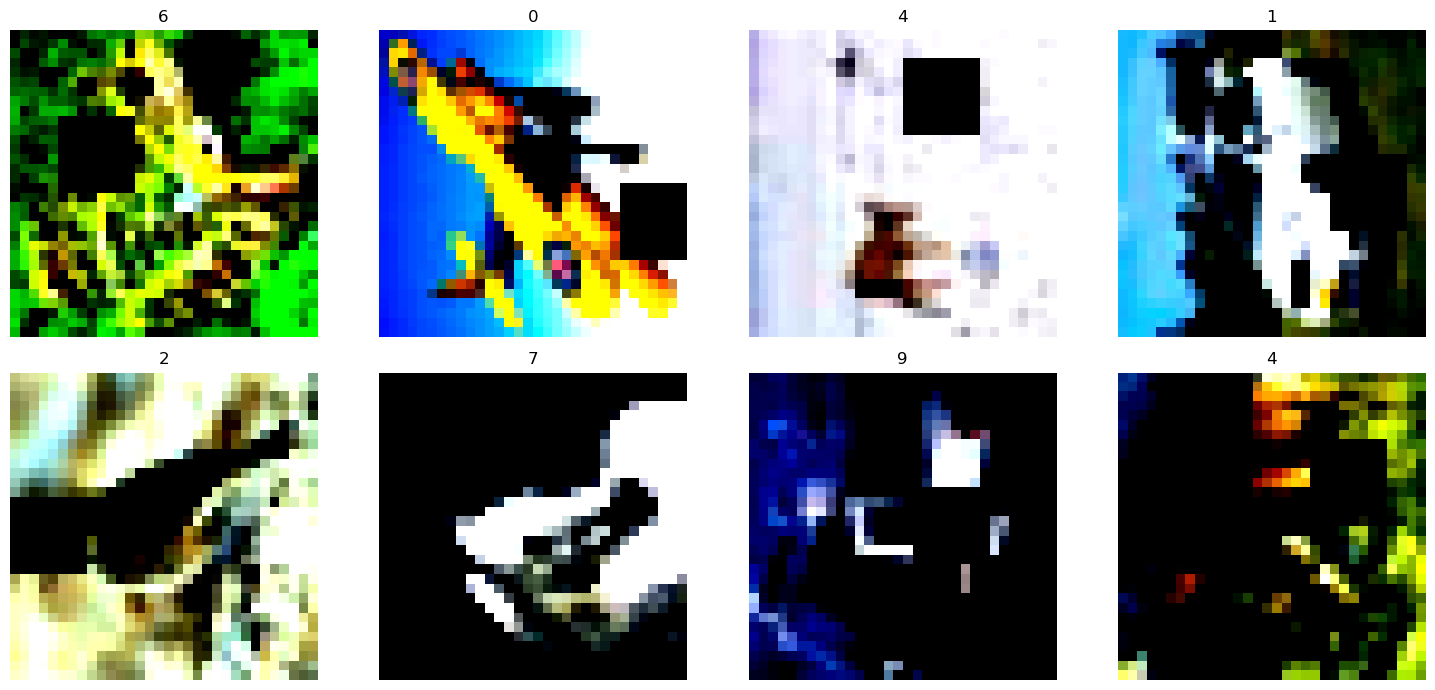

In [17]:
#train_data
Plots(None,9,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

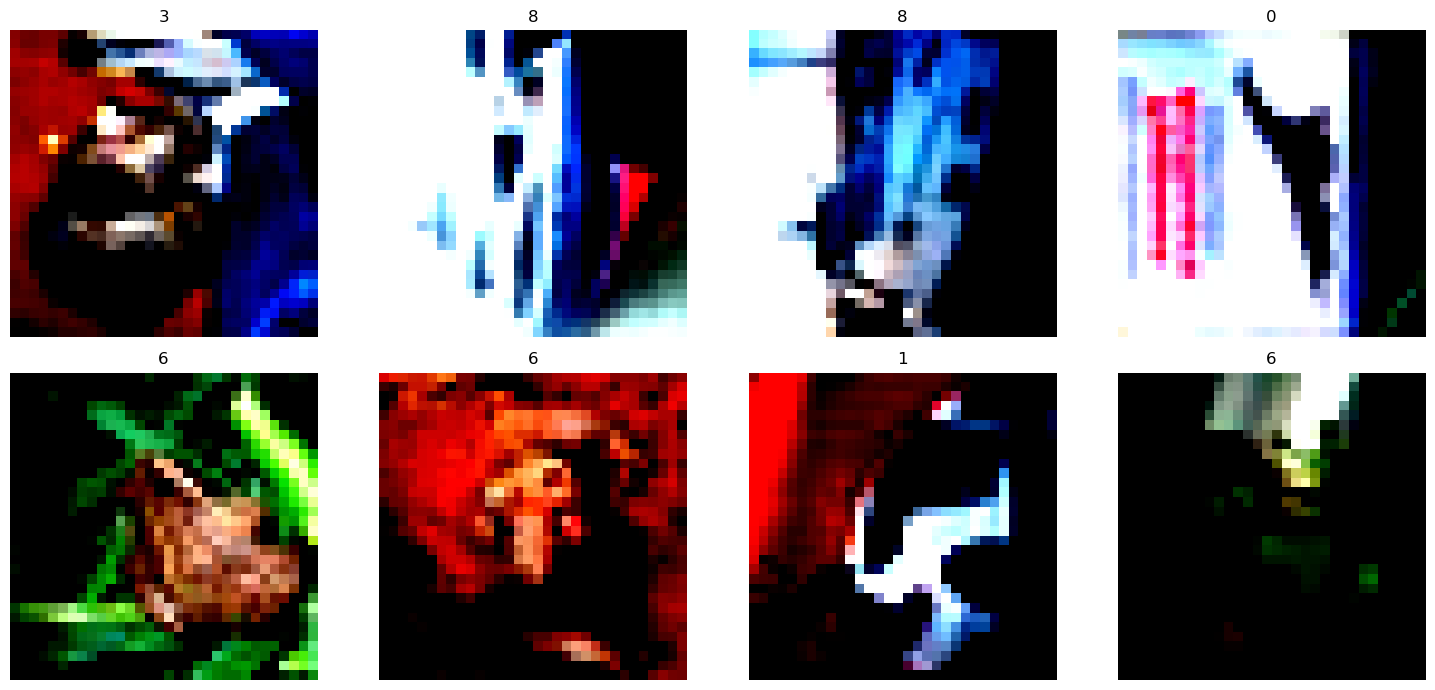

In [18]:
# test_data
Plots(None,9,test_loader).plot_images()

In [19]:
model = NetArch().to("cuda")
     
summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/opt/conda/lib/python3.10/site-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.26E-02


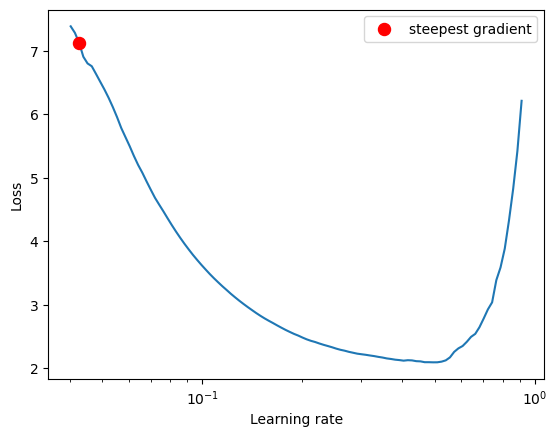

In [20]:
from torch_lr_finder import LRFinder 
from copy import deepcopy
device = "cuda"
# model2 = deepcopy(NetArch()).to(device)
optimizer = optim.Adam(model.parameters(),lr=0.03,weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model,optimizer,criterion,device="cuda")
lr_finder.range_test(train_loader,end_lr=10,num_iter=200,step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [21]:
from torch.optim.lr_scheduler import OneCycleLR 
optimizer = optim.Adam(model.parameters(),lr=0.03,weight_decay=1e-4)
EPOCHS = 24 
scheduler = OneCycleLR(optimizer,max_lr=0.043,steps_per_epoch=len(train_loader),epochs=EPOCHS,pct_start=5/EPOCHS,div_factor=100,three_phase=False,final_div_factor=100,anneal_strategy='linear')
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01],scheduler=scheduler)

for epoch in range(1, 24+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
  #scheduler.step()

Epoch 1


Train: Loss=1.0800 Batch_id=97 Accuracy=54.40: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Test set: Average loss: 0.0019, Accuracy: 6765/10000 (67.65%)

Epoch 2


Train: Loss=1.0205 Batch_id=97 Accuracy=69.40: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Test set: Average loss: 0.0028, Accuracy: 5966/10000 (59.66%)

Epoch 3


Train: Loss=0.7067 Batch_id=97 Accuracy=74.47: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Test set: Average loss: 0.0016, Accuracy: 7396/10000 (73.96%)

Epoch 4


Train: Loss=0.6116 Batch_id=97 Accuracy=78.01: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Test set: Average loss: 0.0016, Accuracy: 7318/10000 (73.18%)

Epoch 5


Train: Loss=0.6721 Batch_id=97 Accuracy=78.23: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Test set: Average loss: 0.0019, Accuracy: 6780/10000 (67.80%)

Epoch 6


Train: Loss=0.6582 Batch_id=97 Accuracy=78.85: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Test set: Average loss: 0.0017, Accuracy: 7233/10000 (72.33%)

Epoch 7


Train: Loss=0.6303 Batch_id=97 Accuracy=80.00: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Test set: Average loss: 0.0018, Accuracy: 7117/10000 (71.17%)

Epoch 8


Train: Loss=0.7206 Batch_id=97 Accuracy=80.57: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Test set: Average loss: 0.0017, Accuracy: 7035/10000 (70.35%)

Epoch 9


Train: Loss=0.5658 Batch_id=97 Accuracy=80.68: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Test set: Average loss: 0.0015, Accuracy: 7517/10000 (75.17%)

Epoch 10


Train: Loss=0.5118 Batch_id=97 Accuracy=80.84: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Test set: Average loss: 0.0018, Accuracy: 7142/10000 (71.42%)

Epoch 11


Train: Loss=0.5397 Batch_id=97 Accuracy=82.03: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Test set: Average loss: 0.0015, Accuracy: 7482/10000 (74.82%)

Epoch 12


Train: Loss=0.4850 Batch_id=97 Accuracy=82.21: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Test set: Average loss: 0.0016, Accuracy: 7329/10000 (73.29%)

Epoch 13


Train: Loss=0.6484 Batch_id=97 Accuracy=82.62: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Test set: Average loss: 0.0021, Accuracy: 6934/10000 (69.34%)

Epoch 14


Train: Loss=0.4562 Batch_id=97 Accuracy=82.79: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Test set: Average loss: 0.0015, Accuracy: 7509/10000 (75.09%)

Epoch 15


Train: Loss=0.4761 Batch_id=97 Accuracy=83.82: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Test set: Average loss: 0.0012, Accuracy: 8005/10000 (80.05%)

Epoch 16


Train: Loss=0.3697 Batch_id=97 Accuracy=84.23: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7828/10000 (78.28%)

Epoch 17


Train: Loss=0.5500 Batch_id=97 Accuracy=85.13: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7850/10000 (78.50%)

Epoch 18


Train: Loss=0.5059 Batch_id=97 Accuracy=86.39: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Test set: Average loss: 0.0012, Accuracy: 8065/10000 (80.65%)

Epoch 19


Train: Loss=0.3366 Batch_id=97 Accuracy=86.90: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Test set: Average loss: 0.0010, Accuracy: 8442/10000 (84.42%)

Epoch 20


Train: Loss=0.3980 Batch_id=97 Accuracy=88.36: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Test set: Average loss: 0.0009, Accuracy: 8566/10000 (85.66%)

Epoch 21


Train: Loss=0.3648 Batch_id=97 Accuracy=89.84: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Test set: Average loss: 0.0010, Accuracy: 8508/10000 (85.08%)

Epoch 22


Train: Loss=0.2473 Batch_id=97 Accuracy=91.61: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Test set: Average loss: 0.0008, Accuracy: 8740/10000 (87.40%)

Epoch 23


Train: Loss=0.1377 Batch_id=97 Accuracy=93.96: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Test set: Average loss: 0.0006, Accuracy: 8971/10000 (89.71%)

Epoch 24


Train: Loss=0.1047 Batch_id=97 Accuracy=96.34: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Test set: Average loss: 0.0006, Accuracy: 9098/10000 (90.98%)



In [23]:
# for layer in model.children():
#    if hasattr(layer, 'reset_parameters'):
#        layer.reset_parameters()

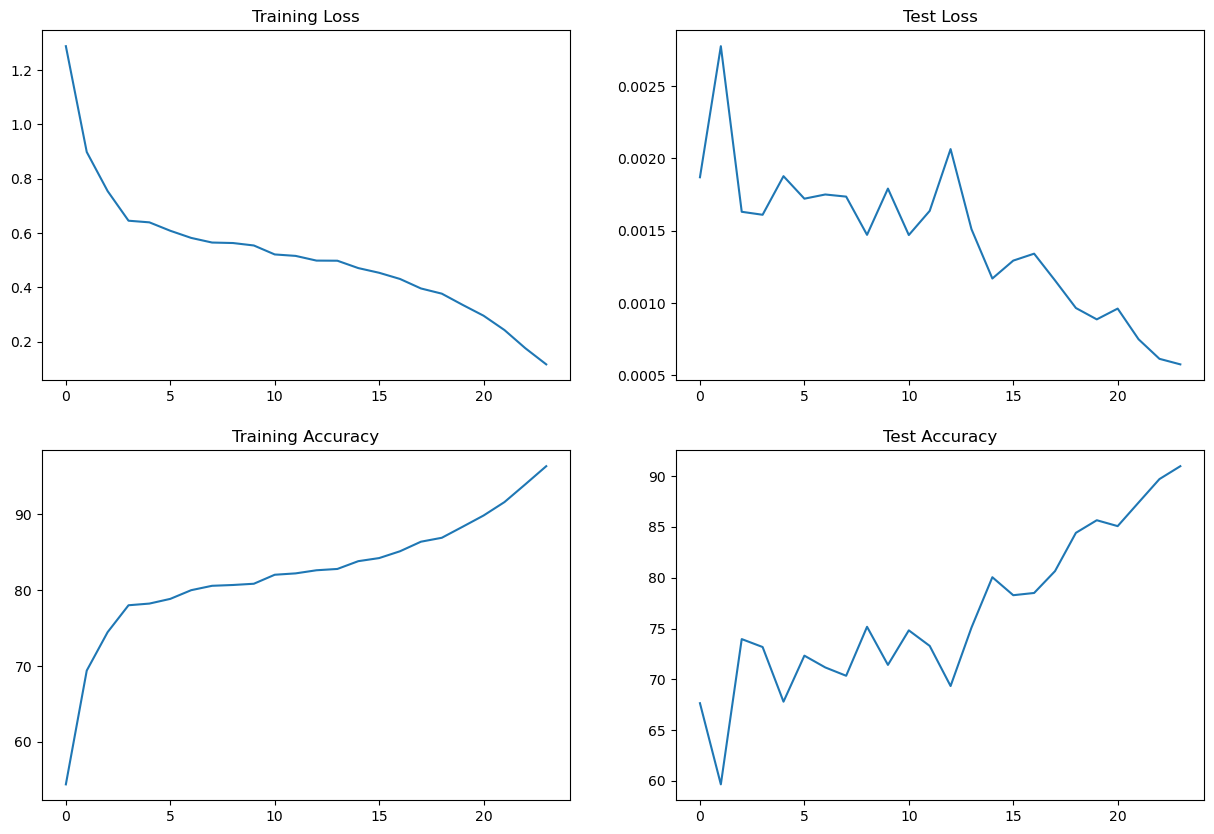

In [22]:
metrics = scores()
plot_metrics(metrics)

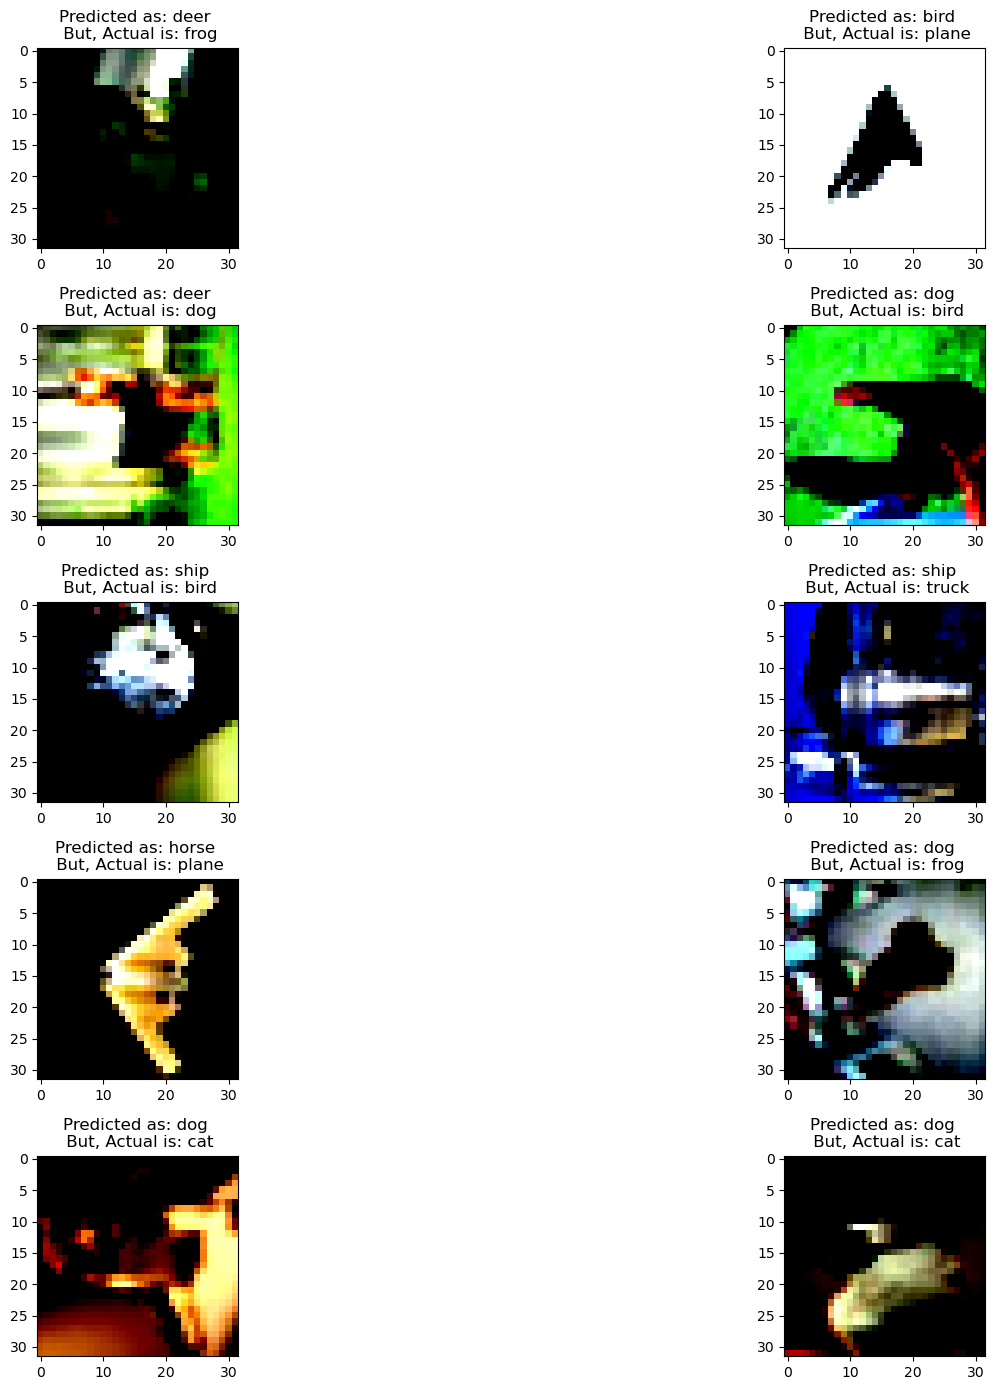

In [24]:

Plots((model,test_loader,device,10)).mis_classified()